Loading dataset from CSV file...
Dataset loaded successfully.
Splitting features and target variable...
Features shape: (568630, 29), Target shape: (568630,)
Splitting the dataset into training and testing sets...
Training set shape: (454904, 29), Testing set shape: (113726, 29)
Standardizing the features...
Features standardized.
Initializing the models...
Training the Naive Bayes model...
Naive Bayes model trained successfully.
Training the MLP model...
Iteration 1, loss = 0.13778904
Validation score: 0.963487
Iteration 2, loss = 0.07829160
Validation score: 0.970038
Iteration 3, loss = 0.06565250
Validation score: 0.974720
Iteration 4, loss = 0.05756063
Validation score: 0.977688
Iteration 5, loss = 0.05208307
Validation score: 0.979688
Iteration 6, loss = 0.04857025
Validation score: 0.981205
Iteration 7, loss = 0.04613378
Validation score: 0.981029
Iteration 8, loss = 0.04425476
Validation score: 0.982722
Iteration 9, loss = 0.04272265
Validation score: 0.983381
Iteration 10, loss

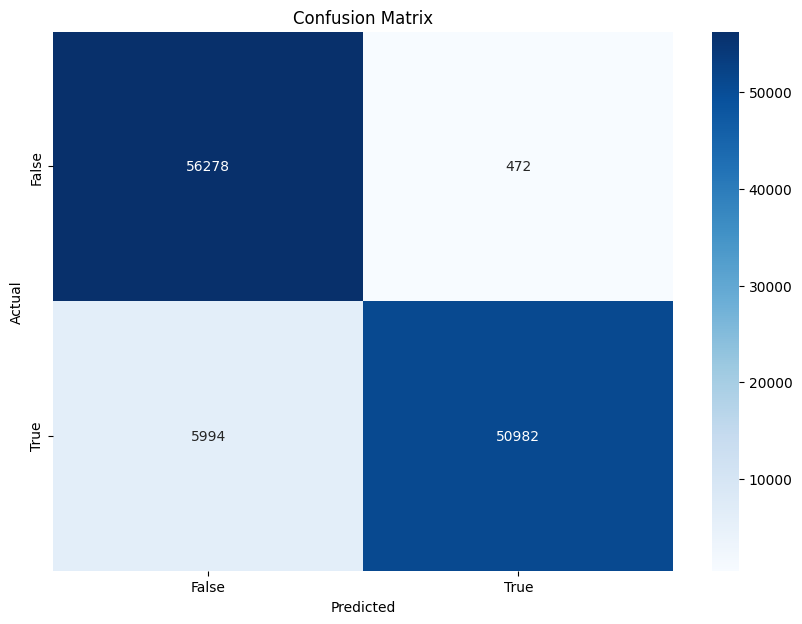

Evaluating the performance of individual models...
Naive Bayes Model Accuracy: 0.92
MLP Model Accuracy: 0.99


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading dataset from CSV file...")
# Load dataset from CSV file
file_path = 'creditcard_2023.csv'
data = pd.read_csv(file_path)
print("Dataset loaded successfully.")

print("Splitting features and target variable...")
# Assuming the last column is the target variable and the rest are features
X = data.drop(columns=['id', 'Class'])
y = data['Class']
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

print("Splitting the dataset into training and testing sets...")
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

print("Standardizing the features...")
# Standardize the features (important for MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features standardized.")

print("Initializing the models...")
# Initialize the models
nb_model = GaussianNB()
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42, verbose=True, early_stopping=True)

print("Training the Naive Bayes model...")
# Train the Naive Bayes model
nb_model.fit(X_train, y_train)
print("Naive Bayes model trained successfully.")

print("Training the MLP model...")
# Train the MLP model
mlp_model.fit(X_train, y_train)
print("MLP model trained successfully.")

print("Creating an ensemble of the models using VotingClassifier...")
# Create an ensemble of the models using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('naive_bayes', nb_model),
    ('mlp', mlp_model)
], voting='soft')  # 'soft' voting uses predicted probabilities

print("Training the ensemble model...")
# Train the ensemble model
ensemble_model.fit(X_train, y_train)
print("Ensemble model trained successfully.")

print("Making predictions with the ensemble model...")
# Make predictions
y_pred = ensemble_model.predict(X_test)
print("Predictions made successfully.")

print("Evaluating the performance of the ensemble model...")
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Plotting the confusion matrix...")
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Evaluating the performance of individual models...")
# You can also evaluate the individual models
nb_pred = nb_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

print(f"Naive Bayes Model Accuracy: {accuracy_score(y_test, nb_pred):.2f}")
print(f"MLP Model Accuracy: {accuracy_score(y_test, mlp_pred):.2f}")
